In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_total = pd.read_csv('cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
df_total.shape

(3962, 18)

In [4]:
df = df_total[df_total['estado'] != 'TOTAL']

In [5]:
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(3804, 18)

In [7]:
type(df_total['data'][0])

str

In [8]:
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [9]:
type(df['data'][0])

datetime.date

Text(0, 0.5, 'Óbitos acumulados')

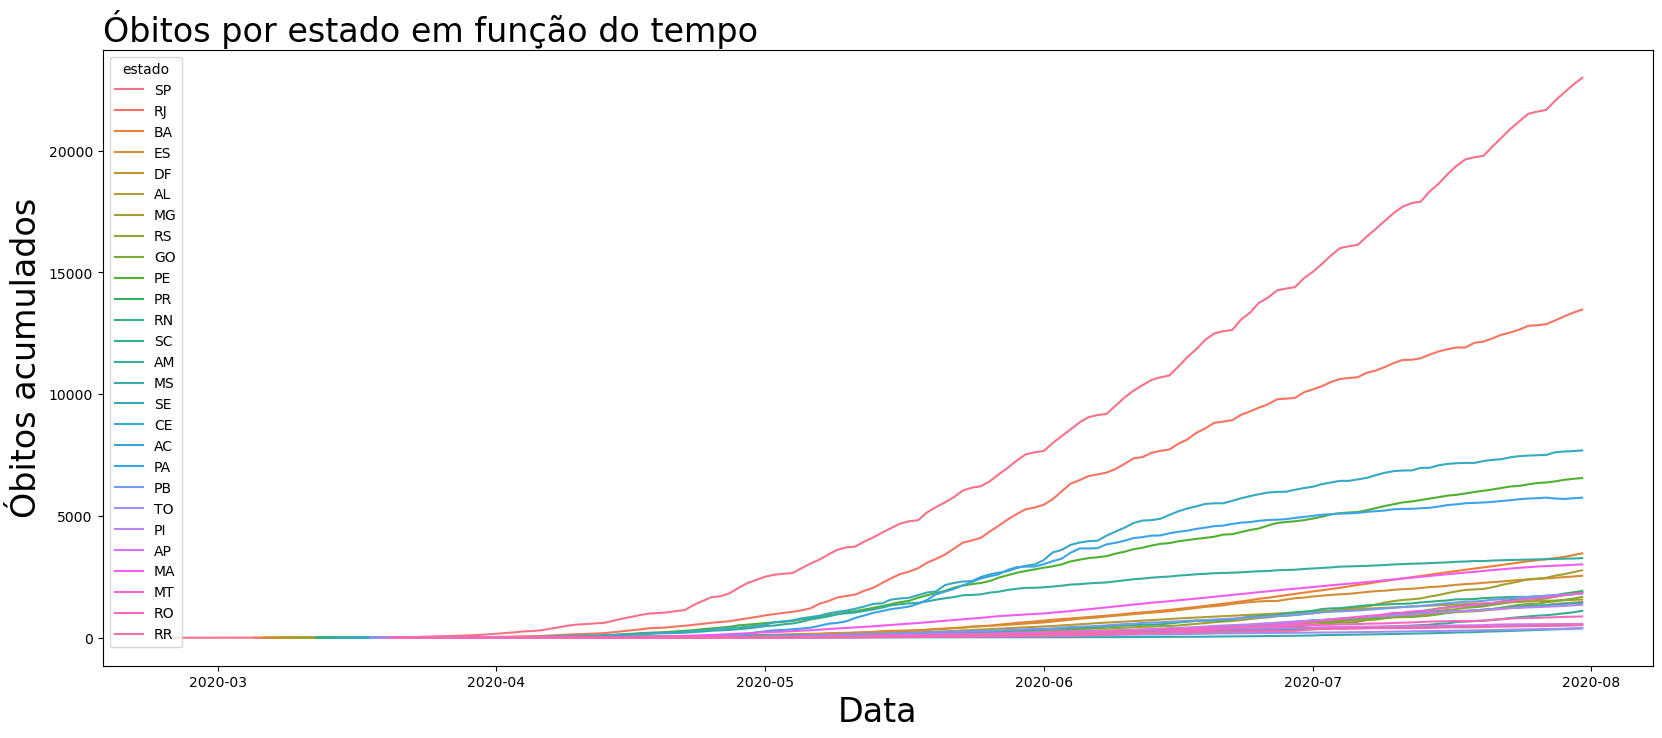

In [10]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos acumulados', fontsize=24)

In [11]:
df_sp = df[df['estado'] == 'SP' ]

In [12]:
df_sp.shape

(158, 18)

Text(0, 0.5, 'Óbitos acumulados')

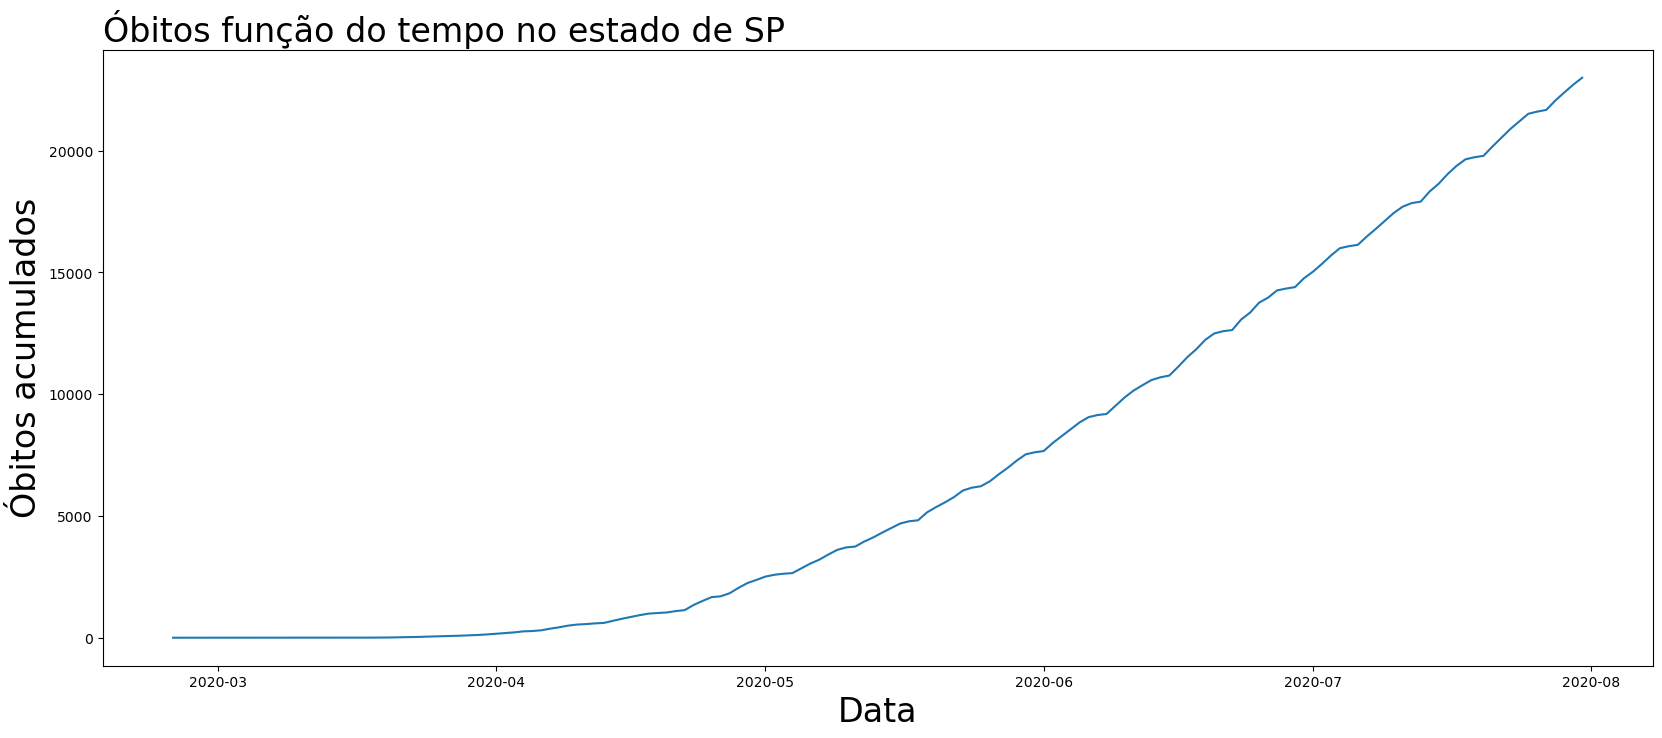

In [13]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', data=df_sp)
fig.set_title('Óbitos função do tempo no estado de SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos acumulados', fontsize=24)

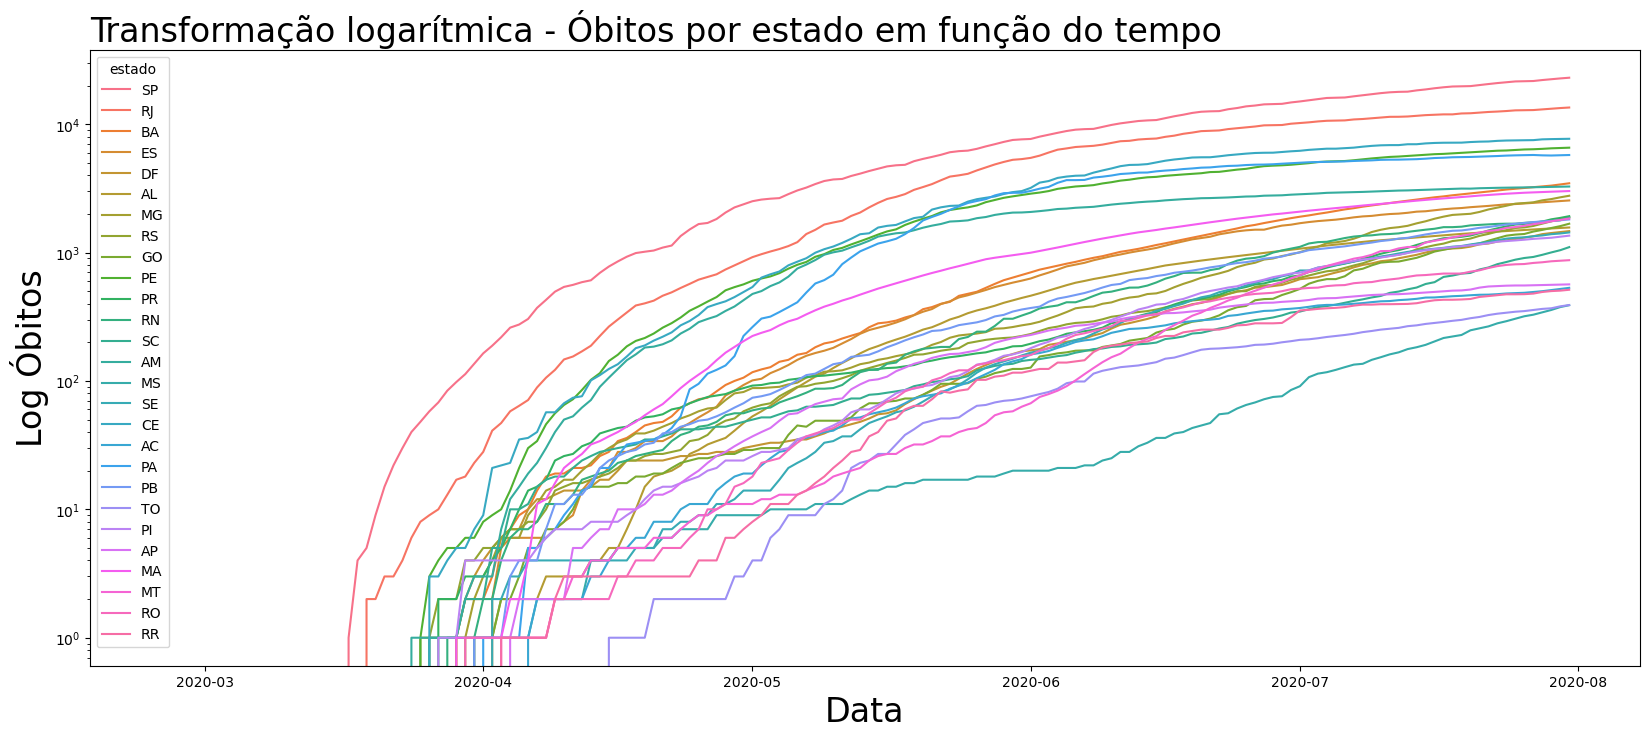

In [14]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Transformação logarítmica - Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')

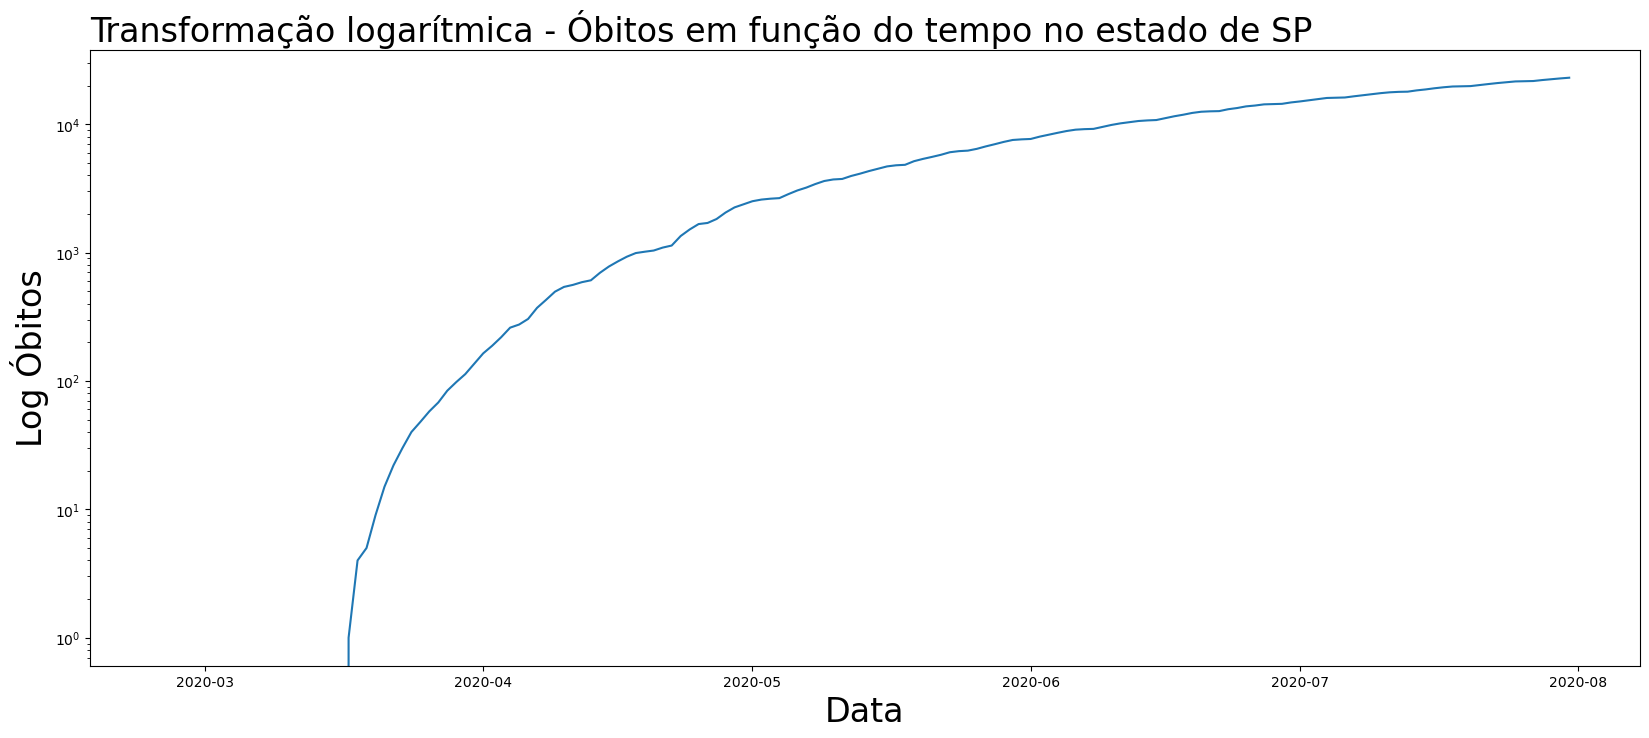

In [15]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', data=df_sp)
fig.set_title('Transformação logarítmica - Óbitos em função do tempo no estado de SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')

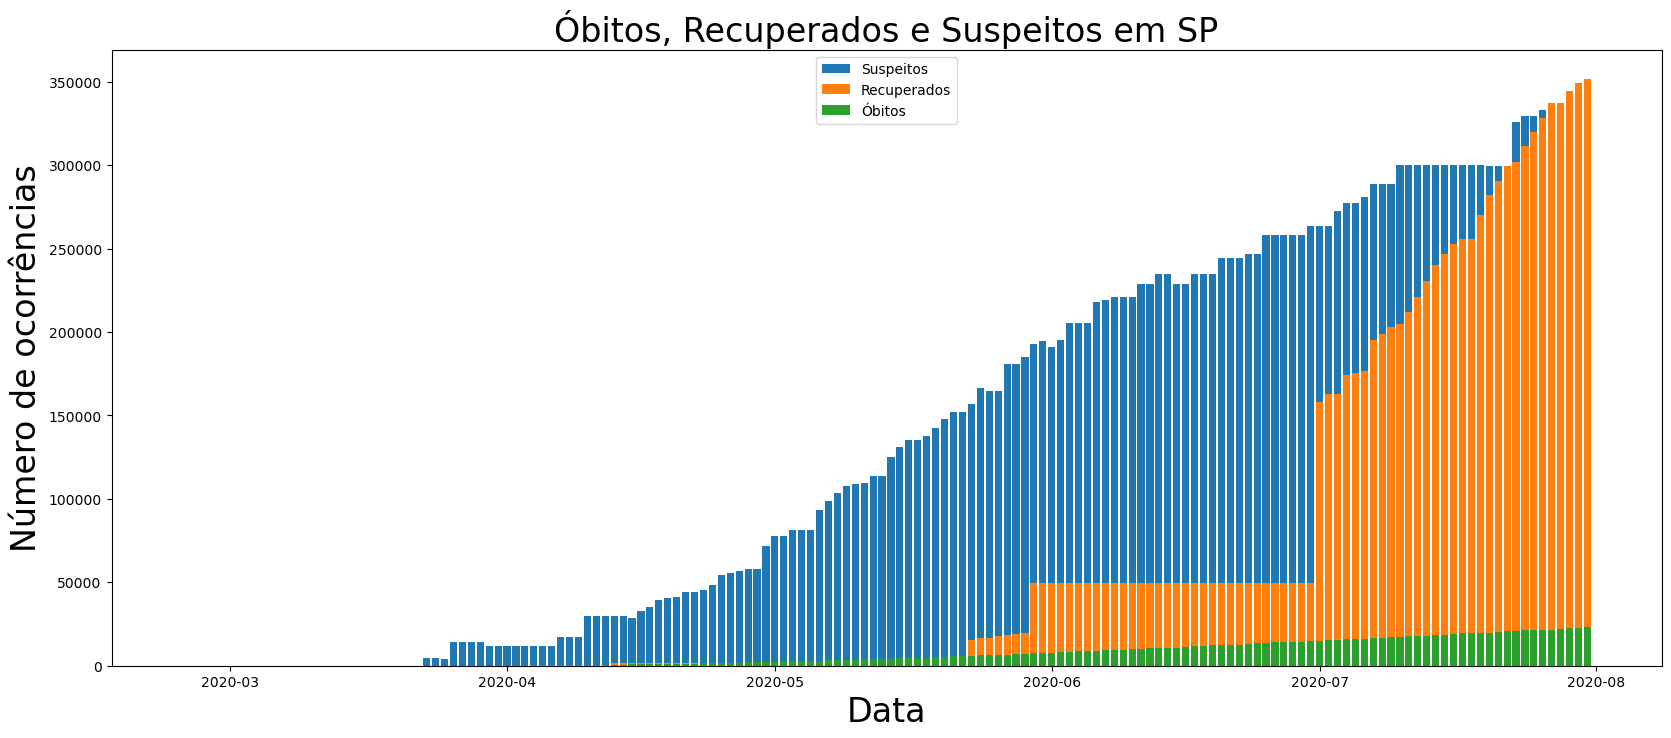

In [16]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp['data'], df_sp['suspeitos'], label='Suspeitos')
plt.bar(df_sp['data'], df_sp['recuperados'], label='Recuperados')
plt.bar(df_sp['data'], df_sp['Obitos'], label='Óbitos')
plt.xlabel('Data',fontsize=24)
plt.title('Óbitos, Recuperados e Suspeitos em SP', fontsize=24)
plt.ylabel('Número de ocorrências',fontsize=24)
plt.legend()

o número de pacientes recuperados teve uma alta muito brusca no mês de julho. 
Isso ocorreu porque, no primeiro dia do mês, o estado de São Paulo divulgou, pela primeira vez, o número de recuperados que não precisaram de internação hospitalar. 
Anteriormente, a secretaria estadual da Saúde calculava apenas o total de altas hospitalares entre pacientes internados com Covid-19. 
Cheque a matéria completa em:
https://g1.globo.com/sp/sao-paulo/noticia/2020/07/01/governo-de-sp-divulga-pela-1a-vez-total-de-recuperados-entre-casos-leves-de-covid-19-e-numero-somados-as-altas-hospitalares-vai-a-157-mil.ghtml

In [17]:
def plotar_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20,rotation=90)

In [18]:
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=24)
    plt.xlabel(xlabel,fontsize=24)
    plt.ylabel(ylabel,fontsize=24,rotation=90)

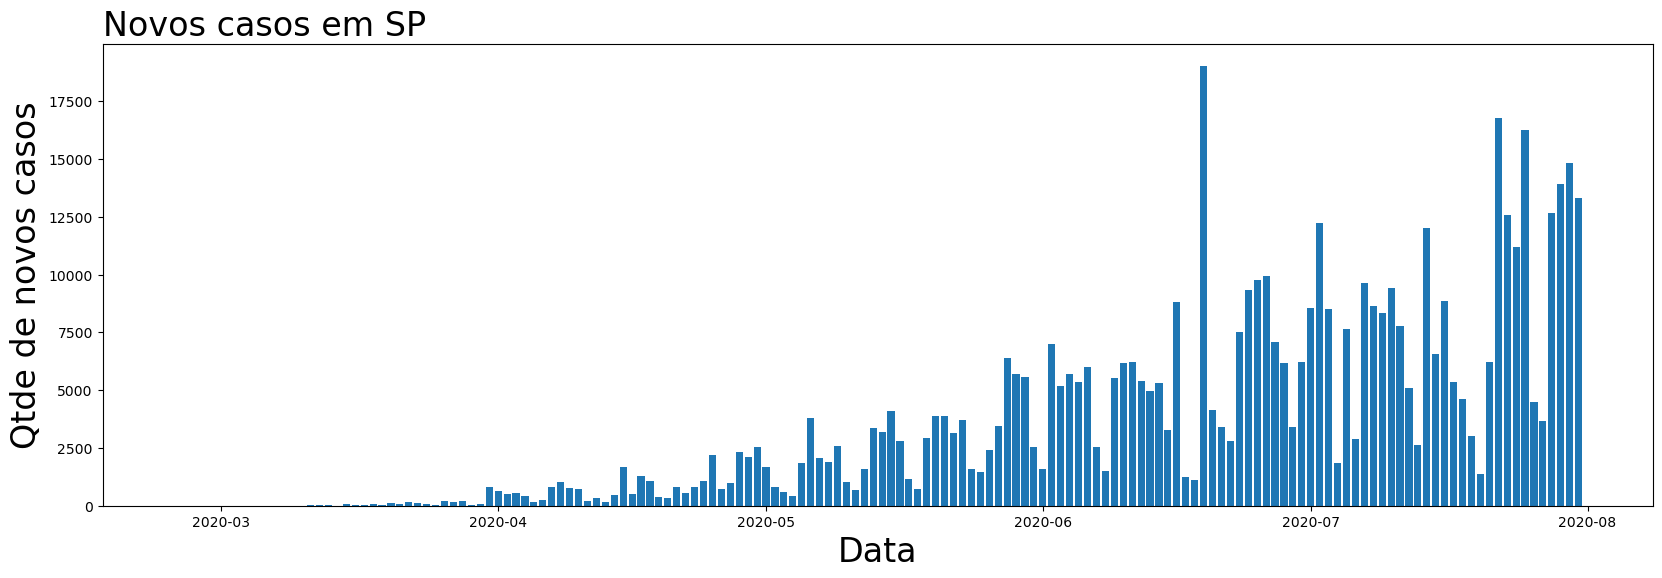

In [19]:
plotar_barra('Novos casos em SP','Data','Qtde de novos casos','data','novosCasos',df_sp)

In [20]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN


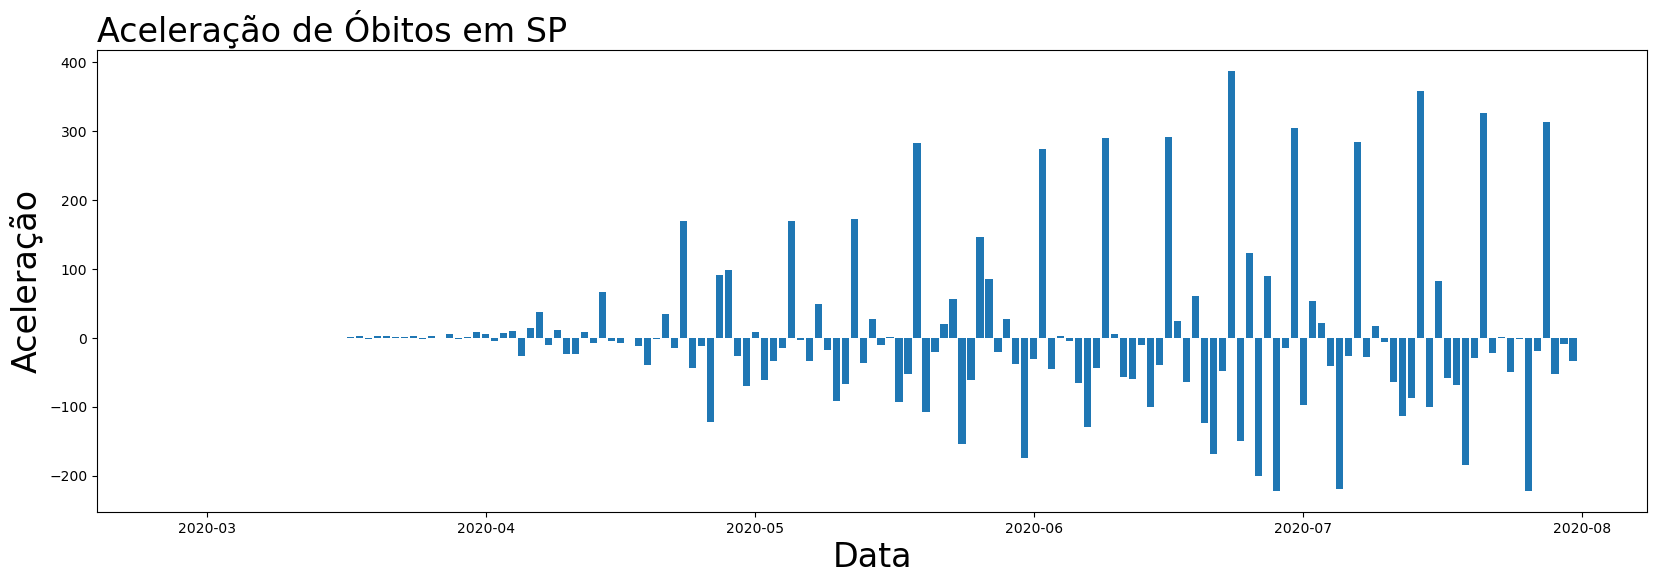

In [21]:
plotar_barra('Aceleração de Óbitos em SP','Data','Aceleração','data','aceleracaoObitos',df_sp)

A grande variação entre os dias ocorre porque existem dias em que são notificados menos óbitos. 

A média móvel é uma forma de contornar esse problema da sazonalidade semanal das notificações.

In [23]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN


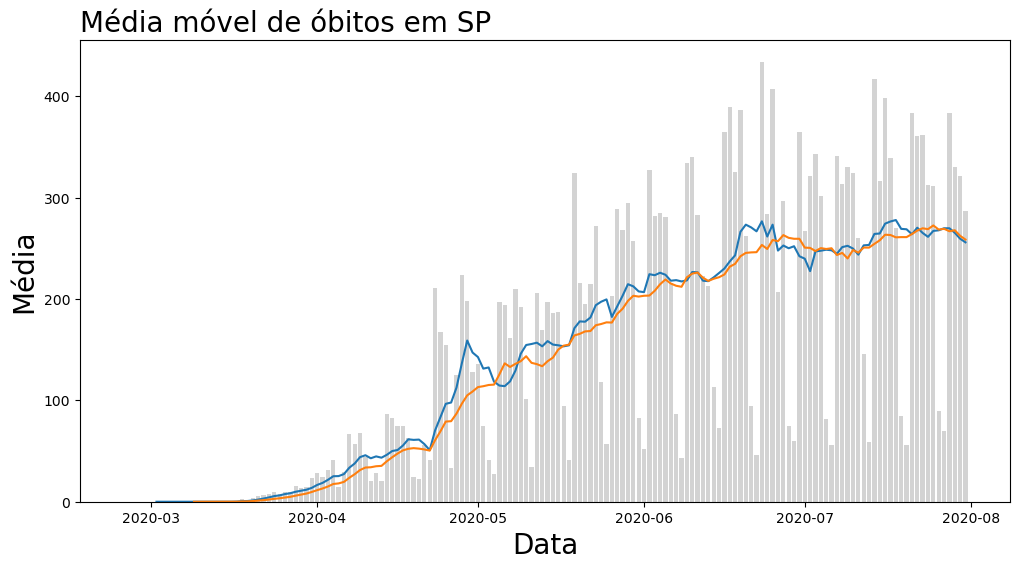

In [105]:
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos_14', df_sp, None)
barra = plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

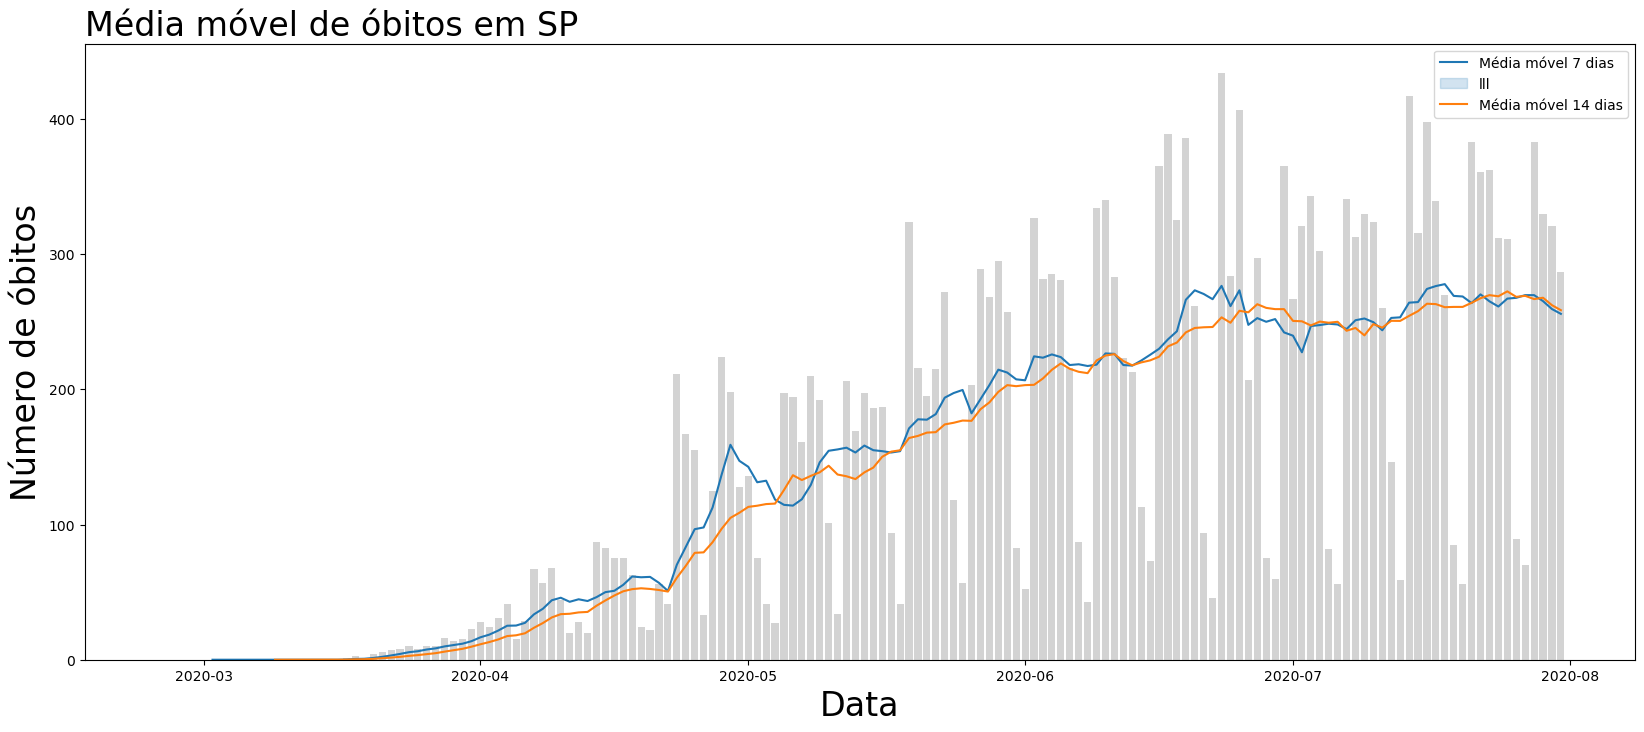

In [86]:
plt.figure(figsize=(20,8))

fig = sns.lineplot(x='data', y='mediaObitos', data=df_sp)
fig = sns.lineplot(x='data', y='mediaObitos_14', data=df_sp)
fig.set_title('Média móvel de óbitos em SP', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Número de óbitos', fontsize=24)
plt.bar(df_sp['data'],df_sp['novosObitos'],color='lightgrey')
plt.legend(labels=["Média móvel 7 dias", "lll", "Média móvel 14 dias"])

In [106]:
from pandas.plotting import autocorrelation_plot

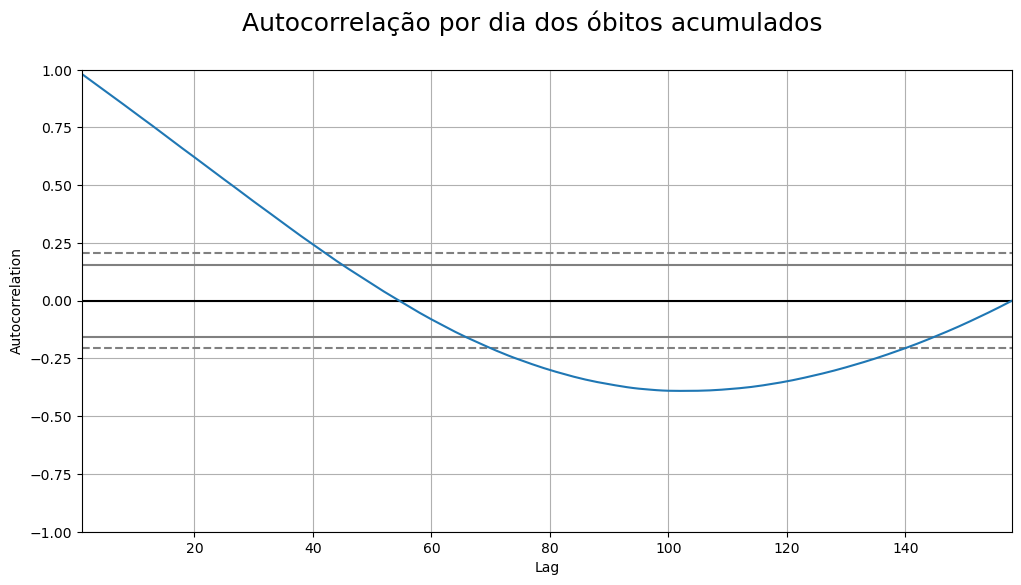

In [123]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação por dia dos óbitos acumulados', fontsize=18)
autocorrelation_plot(df_sp['Obitos'])
ax = ax

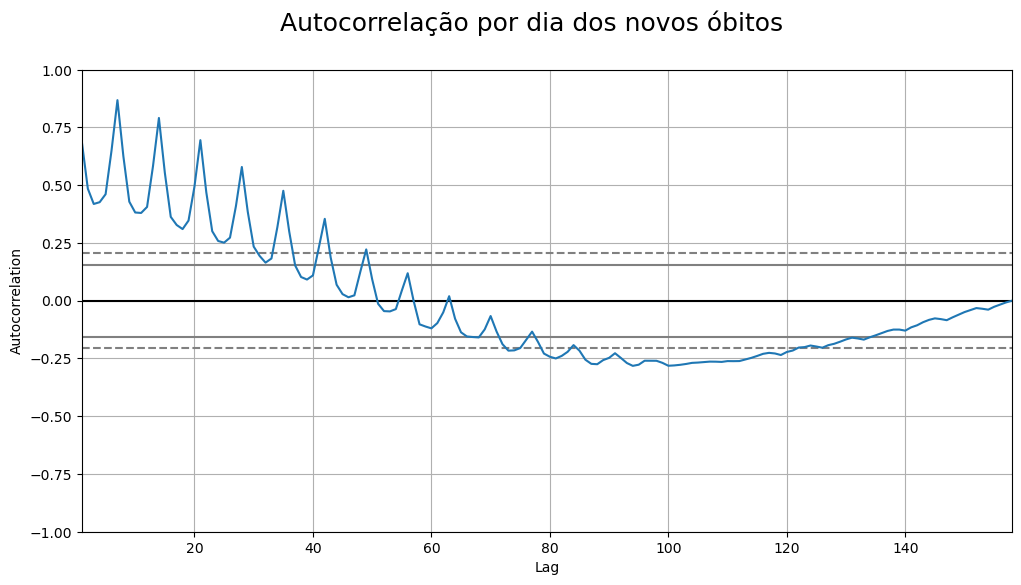

In [125]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação por dia dos novos óbitos',fontsize=18)
autocorrelation_plot(df_sp['novosObitos'])
ax=ax

Presença forte da sazonalidade semanal de notificações

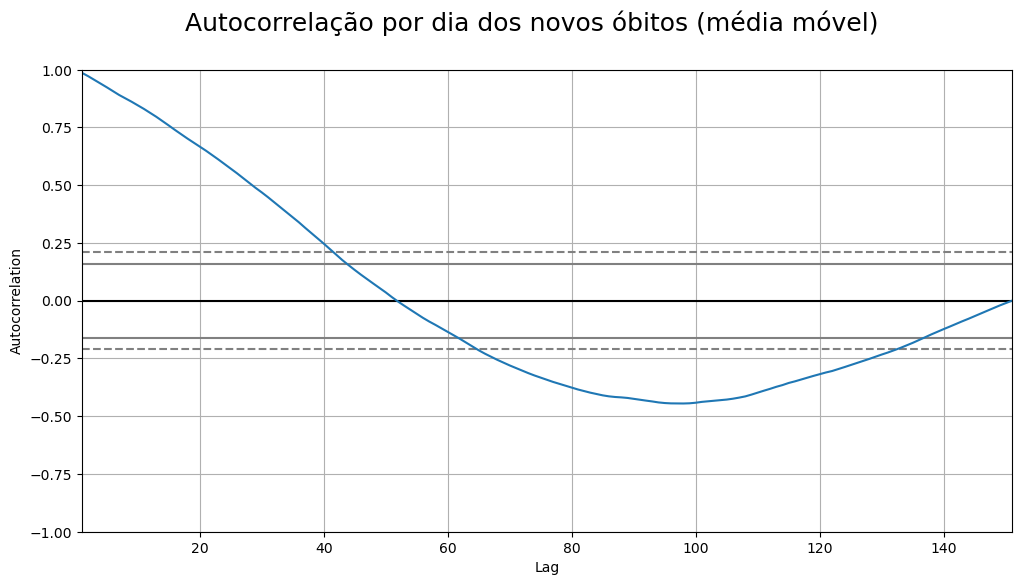

In [126]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação por dia dos novos óbitos (média móvel)',fontsize=18)
autocorrelation_plot(df_sp['mediaObitos'][7:])
ax=ax

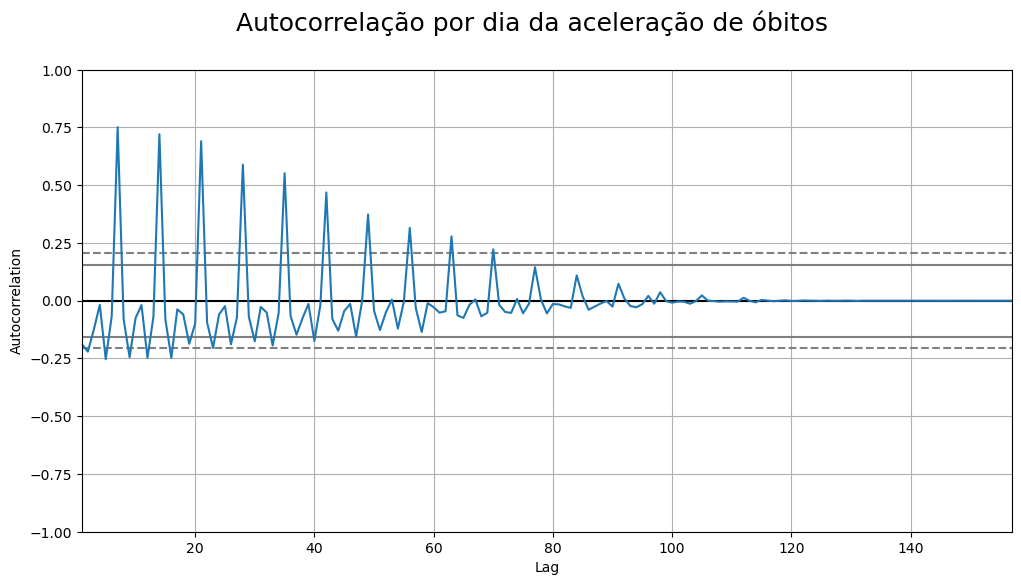

In [128]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação por dia da aceleração de óbitos',fontsize=18)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])
ax=ax

In [130]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name() 
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Saturday


In [131]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
                  'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sabado',
                  'Sunday':'Domingo'}

In [132]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

In [134]:
df_sp.head(7)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Sabado
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-03-01,Domingo
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,2020-03-02,Segunda


In [135]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()

In [138]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sabado,6786.0,155.0,-17.0,Sabado
Segunda,6887.0,41.0,-20.0,Segunda
Sexta,7342.0,177.0,-13.0,Sexta
Terça,6794.0,206.0,175.0,Terça


In [139]:
agrupados_sp = agrupados_sp.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sabado'])

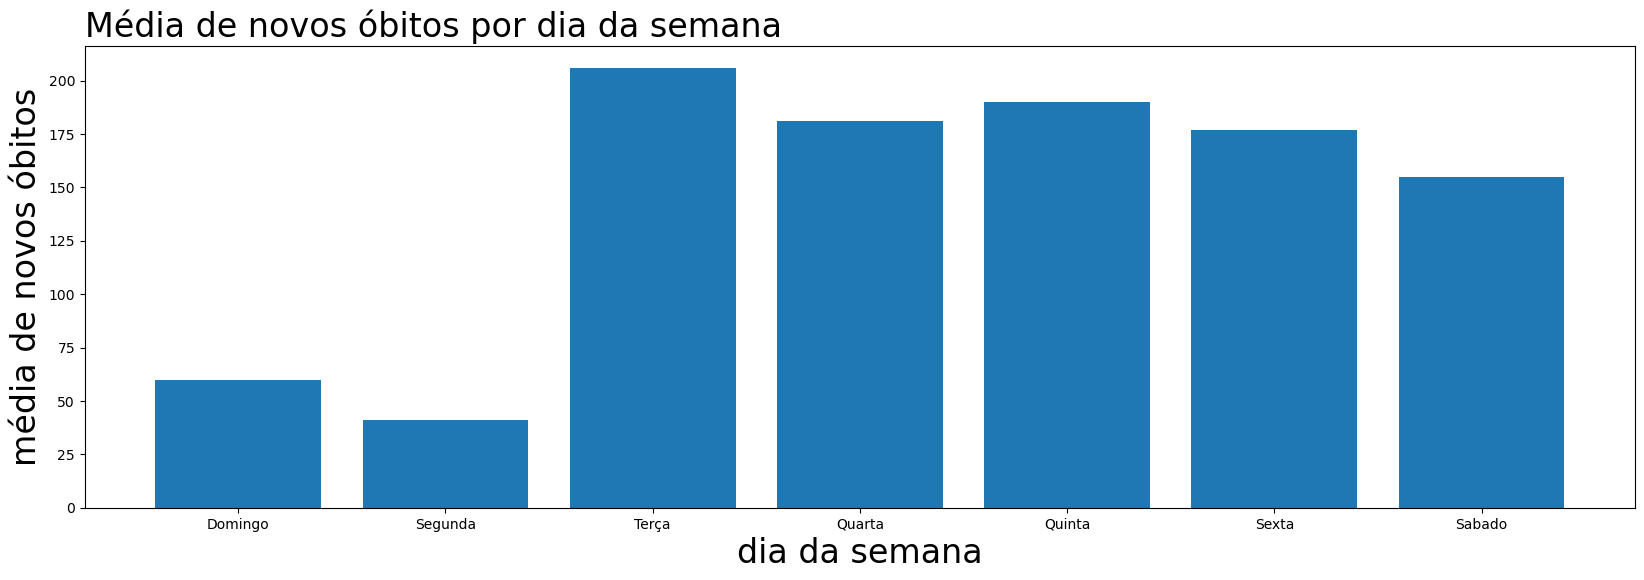

In [143]:
plotar_barra('Média de novos óbitos por dia da semana','dia da semana','média de novos óbitos',
             'dia_da_semana','novosObitos',agrupados_sp)

In [150]:
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df.mes.dt.weekday
    df['diames'] = df.mes.dt.day
    df['mes'] = df.mes.dt.month

    X = df[['diasemana', 'mes', 'diames']]

    if label:
        y= df[label]
        return X, y
    return X

In [151]:
X, y = criar_features(df_sp,label='Obitos')

In [152]:
df_final = pd.concat([X,y],axis=1)

In [153]:
df_final.head(10)

,diasemana,mes,diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


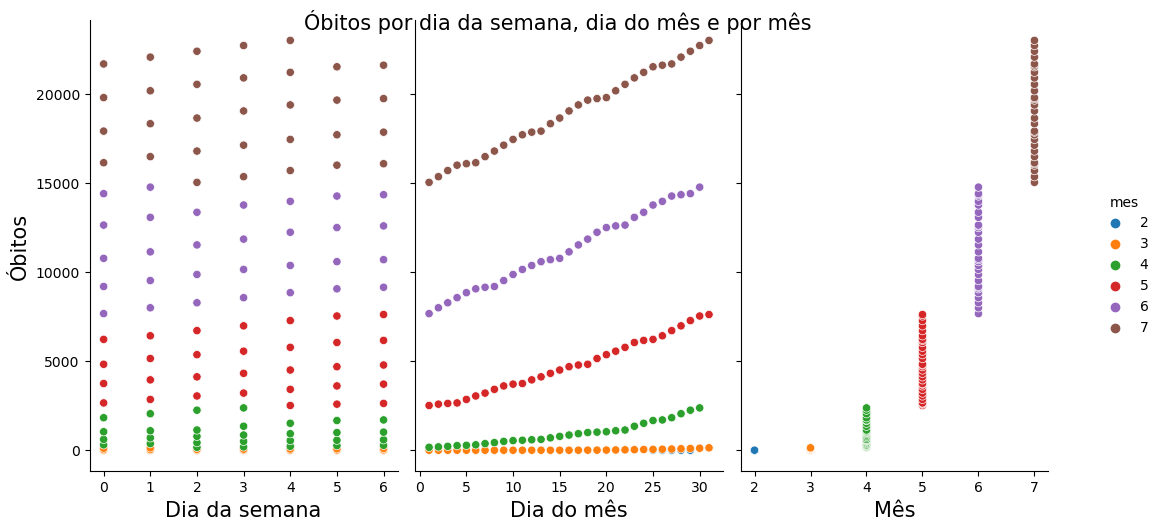

In [159]:
g = sns.pairplot(df_final.dropna(),
                hue='mes',
                palette="tab10",
                x_vars=['diasemana','diames','mes'],
                y_vars='Obitos')

g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da semana',fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês',fontsize=15)
g.axes[0,2].set_xlabel('Mês',fontsize=15)
g.axes[0,0].set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por dia da semana, dia do mês e por mês',fontsize=15)
plt.show()